In [19]:
import numpy as np
from sklearn.metrics import pairwise_distances

class DBScan:
    
    def __init__(self, eps = 0.5, minpts = 4):
        self.eps = eps
        self.minpts = minpts
        self.clusters = None
    
    def fit(self, X):
        self.W = pairwise_distances(X)
        self.clusters = np.array(X.shape[0]*[-1])
        c = 0
        for i in range(X.shape[0]):
            if self.label(i, X) == 'Noise':
                self.clusters[i] = -2
        while True:
            try:
                ind = np.random.choice(np.where(self.clusters == -1)[0])
                if self.isCore(ind, X):
                    self.hbs = set()
                    for index in self.createCluster(ind, X):
                        print(c)
                        self.clusters[index] = c
                    c+=1
            except:
                break
        
    
    def isCore(self, i, X) -> bool:
        count = 0
        for item in range(X.shape[0]):
            if self.W[i, item] < self.eps:
                count+=1
                if count >= self.minpts:
                    return True
        return False
    
    def isBorder(self, i, X):
        for item in range(X.shape[0]):
            if self.W[i, item] < self.eps and self.isCore(item, X):
                    return True
        return False
        
    
    def label(self, i, X):
        return "Core" if self.isCore(i, X) else "Border" if self.isBorder(i, X) else "Noise"
    
    
    def createCluster(self, i, X):
        cluster = []
        cluster.append(i)
        self.hbs.add(i)
        for x in range(X.shape[0]):
            if self.W[i, x] < self.eps and not (x in self.hbs):
                cluster.append(x)
                self.hbs.add(x)
                if self.isCore(x, X):
                    cluster.extend(self.createCluster(x,X))
        return cluster

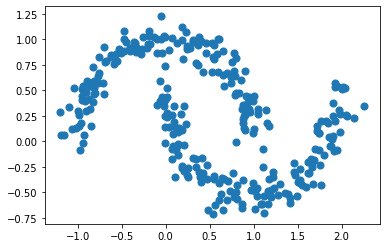

In [20]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

X, y_true = make_moons(n_samples=300, noise = 0.1, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [21]:
dbscan = DBScan(eps = 0.22, minpts = 7)
dbscan.fit(X)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [22]:
clusters = dbscan.clusters
clusters

array([1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1])

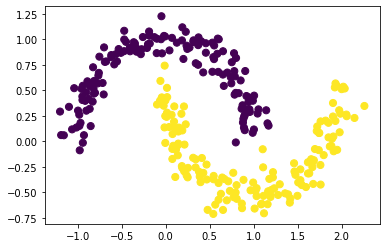

In [23]:
plt.scatter(X[:, 0], X[:, 1], c=clusters, s=50, cmap='viridis')